In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)\
import missingno as msno
import matplotlib.pyplot as plt
import datetime as dt

In [2]:
merged = pd.read_csv('data/merged_state_data.csv')
weather_monthly = pd.read_csv('data/weather_monthly_state_aggregates.csv')
wildfire_size = pd.read_csv('data/wildfire_sizes_before_2010.csv')
drought_data = pd.read_csv('data/drought.csv')

weather_monthly['month'] = pd.to_datetime(weather_monthly['year_month']).dt.month
weather_monthly['year'] = pd.to_datetime(weather_monthly['year_month']).dt.year
weather_monthly.drop(columns=['year_month'], inplace=True)

wildfire_size.rename(columns={'month': 'year_month', 'STATE': 'State'}, inplace=True)

wildfire_size['month'] = pd.to_datetime(wildfire_size['year_month']).dt.month
wildfire_size['year'] = pd.to_datetime(wildfire_size['year_month']).dt.year
wildfire_size.drop(columns=['year_month'], inplace=True)

drought_data.drop(columns=["MapDate", "ValidEnd", 'StatisticFormatID'], inplace=True)
drought_data.rename(columns={'StateAbbreviation': 'State'}, inplace=True)
drought_data['month'] = pd.to_datetime(drought_data['ValidStart']).dt.month
drought_data['year'] = pd.to_datetime(drought_data['ValidStart']).dt.year
drought_data.drop(columns=['ValidStart'], inplace=True)
drought_data = drought_data.groupby(['State', 'year', 'month']).mean().reset_index()

# Concatenation

In [3]:
# Merge weather_monthly and wildfire_size on State, month, and year
merged_weather_wildfire = pd.merge(weather_monthly, wildfire_size, on=['State', 'month', 'year'], how='right')

# Merge the result with the merged dataframe on State
final_merged = pd.merge(merged_weather_wildfire, merged, left_on='State', right_on='State')

# Merge the result with the drought data on State, month, and year
final_merged = pd.merge(final_merged, drought_data, on=['State', 'month', 'year'], how='left')

# Reorder columns to have 'month' and 'year' at iloc 1 and 2
cols = ['State', 'year', 'month'] + [col for col in final_merged.columns if col not in ['State', 'month', 'year', 'total_fire_size']] + ['total_fire_size']
final_merged = final_merged[cols]

# Percentage of Federal Land to number
final_merged['Percentage of Federal Land'] = final_merged['Percentage of Federal Land'].str.rstrip('%').astype('float') / 100.0

final_merged.head()

,State,year,month,PRCP,EVAP,TMIN,TMAX,mean_elevation,Land Area (sq mi),Water Area (sq mi),Total Area (sq mi),Percentage of Federal Land,Urbanization Rate (%),None,D0,D1,D2,D3,D4,total_fire_size
0,AK,1992,4,NaN,NaN,NaN,NaN,580,570641,94743,665384,0.609,64.9,NaN,NaN,NaN,NaN,NaN,NaN,10.1
1,AK,1992,5,5.36,44.17,-56.0,233.0,580,570641,94743,665384,0.609,64.9,NaN,NaN,NaN,NaN,NaN,NaN,4309.5
2,AK,1992,6,14.03,39.27,-17.0,322.0,580,570641,94743,665384,0.609,64.9,NaN,NaN,NaN,NaN,NaN,NaN,86460.6
3,AK,1992,7,16.78,30.91,28.0,300.0,580,570641,94743,665384,0.609,64.9,NaN,NaN,NaN,NaN,NaN,NaN,48578.5
4,AK,1992,8,10.46,20.14,-33.0,267.0,580,570641,94743,665384,0.609,64.9,NaN,NaN,NaN,NaN,NaN,NaN,3321.8


In [4]:
merged_weather_wildfire.shape

(9632, 8)

In [5]:
final_merged.shape

(9632, 20)

<Axes: >

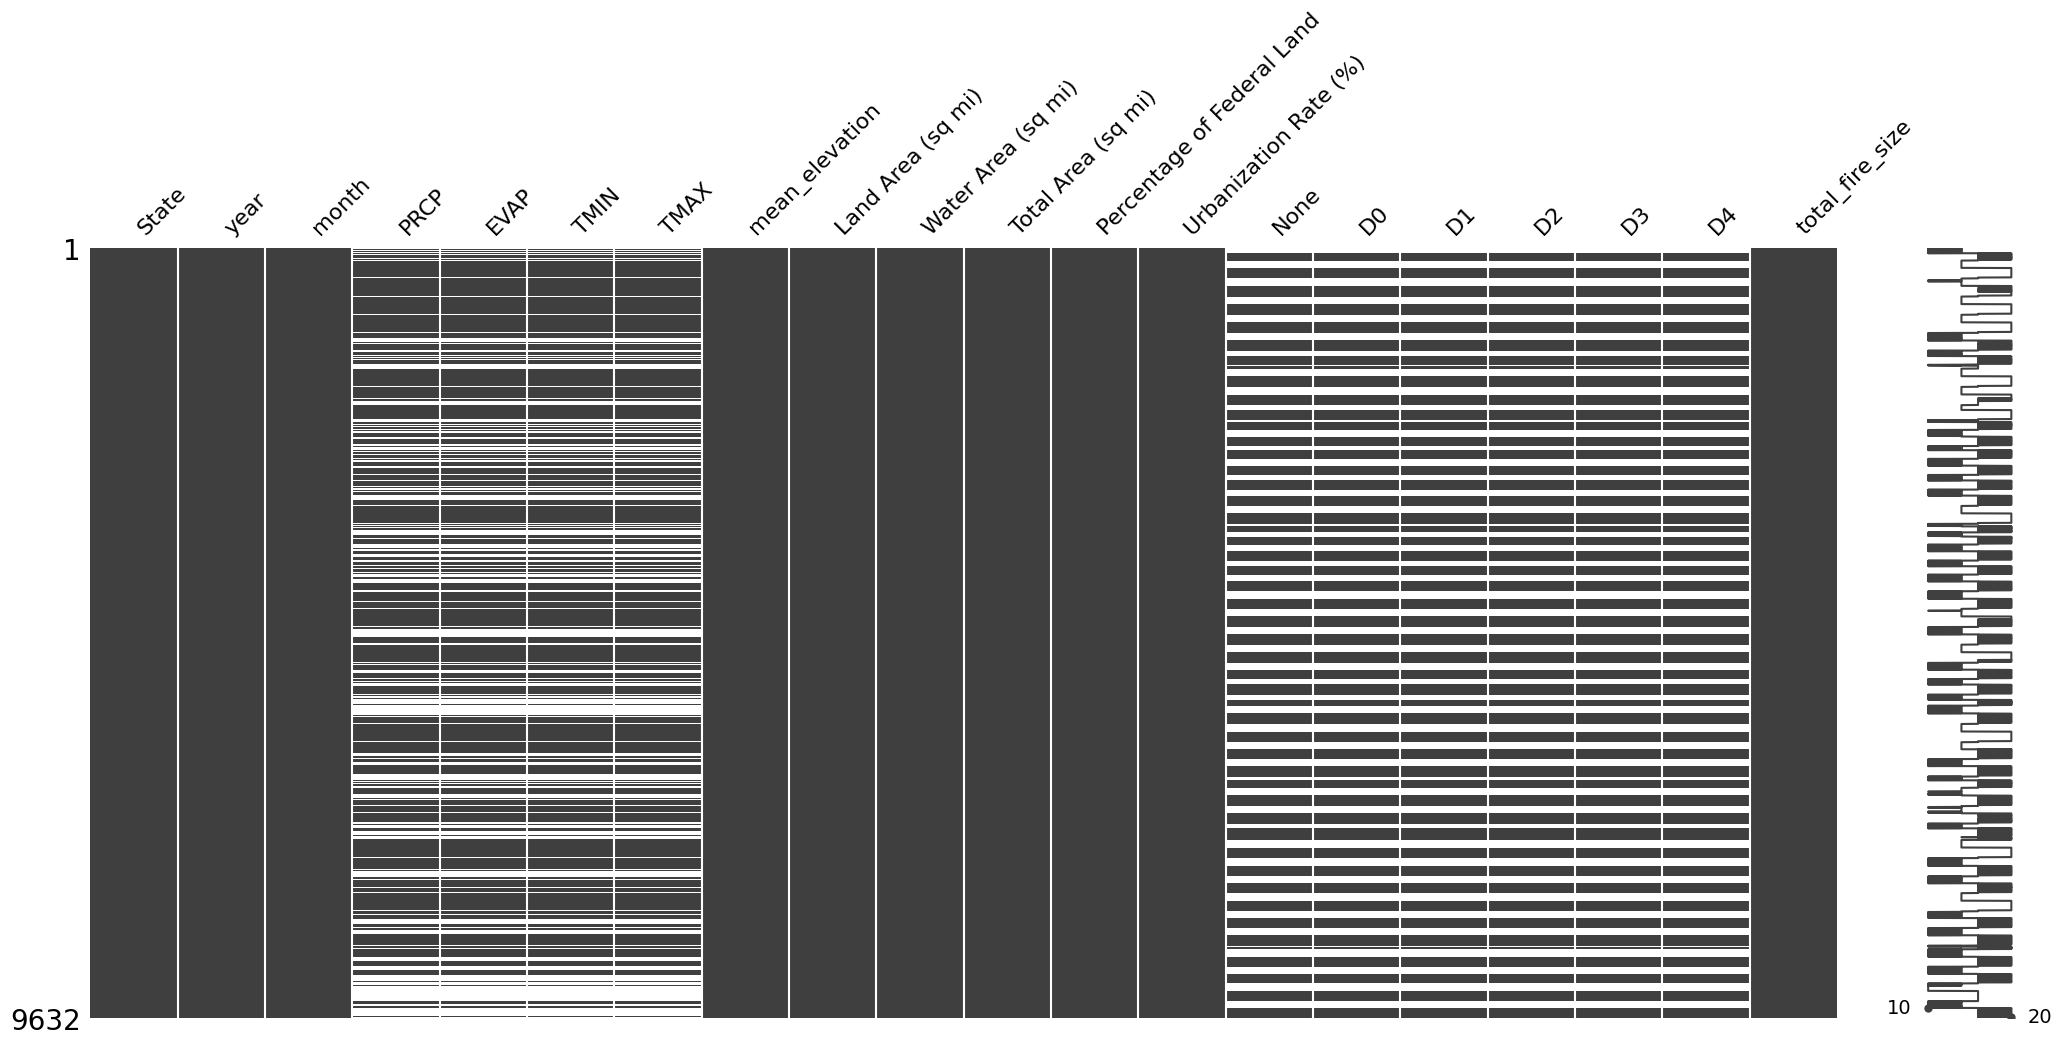

In [6]:
msno.matrix(final_merged)

In [ ]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=3)
final_merged[['PRCP', 'EVAP', 'TMIN', 'TMAX']] = imputer.fit_transform(final_merged[['PRCP', 'EVAP', 'TMIN', 'TMAX']])

In [ ]:
final_merged.head()

,State,year,month,PRCP,EVAP,TMIN,TMAX,mean_elevation,Land Area (sq mi),Water Area (sq mi),Total Area (sq mi),Percentage of Federal Land,Urbanization Rate (%),total_fire_size
0,AK,1992,4,21.221559,50.931341,10.677199,328.046939,580,570641,94743,665384,0.609,64.9,10.1
1,AK,1992,5,5.360000,44.170000,-56.000000,233.000000,580,570641,94743,665384,0.609,64.9,4309.5
2,AK,1992,6,14.030000,39.270000,-17.000000,322.000000,580,570641,94743,665384,0.609,64.9,86460.6
3,AK,1992,7,16.780000,30.910000,28.000000,300.000000,580,570641,94743,665384,0.609,64.9,48578.5
4,AK,1992,8,10.460000,20.140000,-33.000000,267.000000,580,570641,94743,665384,0.609,64.9,3321.8


In [ ]:
final_merged.shape

(9632, 14)

In [ ]:
final_merged['year'].min(), final_merged['year'].max()

(1992, 2010)

# Preparations of final merged

In [ ]:
final_merged.to_csv('data/data_processed_simple.csv', index=False)

# Submission data


In [ ]:
final_file = pd.read_csv('data/zero_submission.csv')
final_file.rename(columns={'month': 'year_month', 'STATE': 'State'}, inplace=True)
final_file.head()

,ID,State,year_month,total_fire_size
0,0,AK,2011-01,0
1,1,AK,2011-02,0
2,2,AK,2011-03,0
3,3,AK,2011-04,0
4,4,AK,2011-05,0


In [ ]:
final_file['month'] = pd.to_datetime(final_file['year_month']).dt.month
final_file['year'] = pd.to_datetime(final_file['year_month']).dt.year
final_file.drop(columns=['year_month'], inplace=True)
final_file.head(5)

,ID,State,total_fire_size,month,year
0,0,AK,0,1,2011
1,1,AK,0,2,2011
2,2,AK,0,3,2011
3,3,AK,0,4,2011
4,4,AK,0,5,2011


In [ ]:
extra_uniq = extra_data['State'].unique()
final_uniq = final_file['State'].unique()

missing_states = set(final_uniq) - set(extra_uniq)
missing_states

{'AK', 'HI'}

In [ ]:
from sklearn.impute import KNNImputer

# Merge final_file and merged
final_merged = pd.merge(final_file, merged, on=['State'])

final_merged = pd.merge(final_merged, weather_monthly, on=['State', 'year', 'month'], how='outer')


imputer = KNNImputer(n_neighbors=3)
final_merged[['PRCP', 'EVAP', 'TMIN', 'TMAX']] = imputer.fit_transform(final_merged[['PRCP', 'EVAP', 'TMIN', 'TMAX']])

# Percentage of Federal Land to number
final_merged['Percentage of Federal Land'] = final_merged['Percentage of Federal Land'].str.rstrip('%').astype('float') / 100.0

final_merged_2011_2015 = final_merged[(final_merged['year'] >= 2011) & (final_merged['year'] <= 2015)]
final_merged_2011_2015

final_merged_2011_2015.shape

(3000, 21)

In [ ]:
final_merged_2011_2015.shape

(3000, 21)

In [ ]:
final_merged_2011_2015.describe()

,ID,total_fire_size,month,year,mean_elevation,Land Area (sq mi),Water Area (sq mi),Total Area (sq mi),Percentage of Federal Land,Urbanization Rate (%),PRCP,EVAP,TMIN,TMAX,t2m,d2m,u10,v10,lai_hv,lai_lv
count,3000.000000,3000.0,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.00000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000
mean,1499.500000,0.0,6.500000,2013.000000,518.060000,70636.920000,5296.680000,75933.52000,0.152560,72.458000,22.940518,62.851902,-15.651331,280.669133,285.167650,277.970639,0.507376,0.288974,2.312423,1.277840
std,866.169729,0.0,3.452628,1.414449,521.427047,84967.355216,14115.137803,96365.28055,0.202186,14.170398,18.748661,120.251343,101.936311,97.823181,10.065741,9.600977,0.672005,0.622357,1.136426,0.649492
min,0.000000,0.0,1.000000,2011.000000,20.000000,1034.000000,192.000000,1545.00000,0.003000,35.100000,0.000000,-96.870000,-333.000000,-83.000000,256.952800,253.374440,-1.738993,-1.735453,0.549933,0.045525
25%,749.750000,0.0,3.750000,2012.000000,180.000000,35826.000000,701.000000,36420.00000,0.019000,63.200000,8.847500,16.062500,-72.000000,222.333333,277.448660,270.390150,0.091715,-0.078800,1.495900,0.841755
50%,1499.500000,0.0,6.500000,2013.000000,300.000000,53891.500000,1501.500000,57093.50000,0.052000,72.100000,20.260000,40.760000,-17.000000,305.833333,286.395025,278.351850,0.501831,0.257622,2.076671,1.234556
75%,2249.250000,0.0,9.250000,2014.000000,610.000000,81759.000000,4509.000000,84897.00000,0.202000,85.600000,32.188333,65.027500,52.166667,348.000000,293.643318,286.374195,0.919317,0.605644,3.144423,1.711794
max,2999.000000,0.0,12.000000,2015.000000,2070.000000,570641.000000,94743.000000,665384.00000,0.801000,94.200000,224.330000,2357.000000,228.000000,539.000000,305.912540,296.835140,3.491894,3.798499,5.161304,2.736793


In [ ]:
# final_merged_2011_2015.to_csv('data/submission_merged.csv', index=False)

# Dataset splitting

In [ ]:
# from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import StandardScaler

# # Initialize the StandardScaler
# scaler = StandardScaler()

# # Separate the data into X and y
# X = final_merged.drop(columns=['total_fire_size'])
# y = final_merged['total_fire_size']

# # Scale everything except year, month, and state
# X_scaled = X.copy()
# columns_to_scale = X_scaled.columns.difference(['State', 'year', 'month'])
# X_scaled[columns_to_scale] = scaler.fit_transform(X_scaled[columns_to_scale])

# # Split the data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [ ]:
# import lightgbm as lgb

# # Initialize the LGBMRegressor with fixed hyperparameters
# grd = lgb.LGBMRegressor(n_estimators=1000, objective='regression', learning_rate=0.001, max_depth=16, reg_lambda=1e-12, random_state=42, verbose=1)

# # Fit the model
# grd.fit(X_train, y_train)

# # Predict the test set
# y_pred = grd.predict(X_test)

# # Calculate the mse
# rmse = np.sqrt(np.mean((y_test - y_pred)**2))
# rmse

ValueError: pandas dtypes must be int, float or bool.
Fields with bad pandas dtypes: State: object

In [ ]:
# from sklearn.model_selection import KFold
# import numpy as np
# import pandas as pd
# import lightgbm as lgb

# # Define the custom metric for regression
# def custom_metric(y_true, y_pred):
#     ratio = y_true / y_pred
#     log_ratio = np.log(ratio)
#     clipped_log_ratio = np.minimum(log_ratio, 10)
#     score = np.mean(clipped_log_ratio)
#     return score

# # Initialize the KFold
# kf = KFold(n_splits=5, random_state=17, shuffle=True)

# # Initialize the LGBMRegressor with fixed hyperparameters
# grd = lgb.LGBMRegressor(random_state=17)

# # List to store custom metric scores
# custom_scores = []

# # Perform cross-validation
# for train_indices, val_indices in kf.split(X_train, y_train):
#     X_train_fold = X_train.iloc[train_indices]
#     y_train_fold = y_train.iloc[train_indices]
#     X_val_fold = X_train.iloc[val_indices]
#     y_val_fold = y_train.iloc[val_indices]
    
#     # Fit the model
#     grd.fit(X_train_fold, y_train_fold)
    
#     # Predict values
#     y_pred = grd.predict(X_val_fold)
    
#     # Calculate the custom metric
#     score = custom_metric(y_val_fold, y_pred)
    
#     # Append the score to the list
#     custom_scores.append(score)

# # Calculate the mean custom metric score across all folds
# mean_custom_score = np.mean(custom_scores)
# print(f"Mean Custom Metric Score: {mean_custom_score}")

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000442 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2541
[LightGBM] [Info] Number of data points in the train set: 5943, number of used features: 19
[LightGBM] [Info] Start training from score 8475.410185
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000519 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2535
[LightGBM] [Info] Number of data points in the train set: 5943, number of used features: 19
[LightGBM] [Info] Start training from score 8724.801289
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead o

/Users/denisbespalko/GitHub/Hackathon_22feb/.venv/lib/python3.10/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/denisbespalko/GitHub/Hackathon_22feb/.venv/lib/python3.10/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/denisbespalko/GitHub/Hackathon_22feb/.venv/lib/python3.10/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/denisbespalko/GitHub/Hackathon_22feb/.venv/lib/python3.10/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000515 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2536
[LightGBM] [Info] Number of data points in the train set: 5944, number of used features: 19
[LightGBM] [Info] Start training from score 8505.488389
Mean Custom Metric Score: -2.1526060660210833


/Users/denisbespalko/GitHub/Hackathon_22feb/.venv/lib/python3.10/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
